<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/Autoencoder_using_tf_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 784)

In [5]:
x_train.shape

(60000, 784)

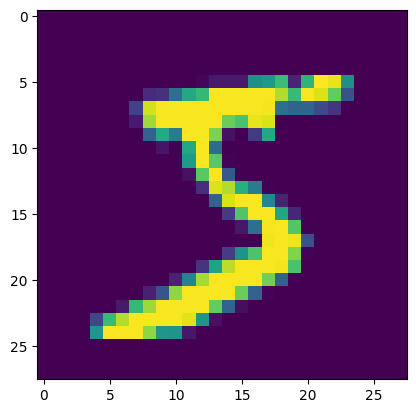

In [25]:
plt.imshow(x_train[0].reshape(28,28))

In [15]:
# prepare the encoder and decoder layers
encoding_dim = 32

input_img = keras.Input(shape=(784,))

# encoder layers
encoder_layer = layers.Dense(512, activation="relu")(input_img)
encoder_layer = layers.Dense(256, activation="relu")(encoder_layer)
encoder_layer = layers.Dense(128, activation="relu")(encoder_layer)
encoder_layer = layers.Dense(encoding_dim, activation="relu")(encoder_layer)

# decoder layer
decoder_layer = layers.Dense(784, activation="sigmoid")(encoder_layer)

autoencoder = keras.Model(input_img, decoder_layer)

In [16]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,144 (2.27 MB)

 Trainable params: 596,144 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model using binary cross-entropy
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [18]:
# fit the model on the train dataset
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3428 - val_loss: 0.1485
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1393 - val_loss: 0.1180
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1161 - val_loss: 0.1067
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1064 - val_loss: 0.1010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1011 - val_loss: 0.0968
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0971 - val_loss: 0.0938
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0946 - val_loss: 0.0922
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0925 - val_loss: 0.0903
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0912 - val_loss: 0.0891
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0898 - val_loss: 0.0885
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0890 - val_loss: 0.0875
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
autoencoder.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[3.9737939e-25, 8.1824126e-28, 3.7397003e-27, ..., 7.1646159e-30,
        1.4367841e-23, 7.7132469e-28],
       [1.4207479e-18, 1.2256145e-21, 1.3089135e-19, ..., 1.4813416e-22,
        4.0272774e-13, 2.7449045e-15],
       [2.8929713e-27, 5.6457572e-28, 6.0444066e-30, ..., 2.3763534e-28,
        1.1714453e-21, 3.6544907e-20],
       [9.4949146e-13, 8.1126927e-15, 1.4301899e-15, ..., 1.4957626e-14,
        3.3127917e-13, 2.4568853e-13],
       [6.9581793e-16, 3.4459426e-16, 7.5552364e-20, ..., 4.4306015e-18,
        2.9574954e-15, 2.5053812e-17]], dtype=float32)

In [26]:
# autoencoder for the convolutional images data
X_train = x_train.reshape((len(x_train), 28, 28, 1))
X_test = x_test.reshape((len(x_test), 28, 28, 1))

In [67]:
def convautoencoder():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2), padding='same'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(encoding_dim, activation='relu'))
  model.add(layers.Dense(8*7*7, activation='relu'))
  model.add(layers.Reshape((7, 7, 8)))
  model.add(layers.Conv2DTranspose(128, (2,2), strides=(2, 2), activation='relu', padding='same'))
  model.add(layers.Conv2DTranspose(1, (2,2), strides=(2, 2), activation='tanh', padding='same'))
  return model

In [68]:
conv_model = convautoencoder()

In [69]:
conv_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 392)            │        12,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_47             │ (None, 14, 14, 128)    │         4,224 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_48             │ (None, 28, 28, 1)      │           513 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,481 (361.25 KB)

 Trainable params: 92,481 (361.25 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compile the model
conv_model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [74]:
history = conv_model.fit(X_train, X_train,
                epochs=50,
                batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 302ms/step - accuracy: 0.8040 - loss: 0.0640 - val_accuracy: 0.8079 - val_loss: 0.0217
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 292ms/step - accuracy: 0.8099 - loss: 0.0202 - val_accuracy: 0.8111 - val_loss: 0.0164
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 303ms/step - accuracy: 0.8119 - loss: 0.0163 - val_accuracy: 0.8118 - val_loss: 0.0147
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 298ms/step - accuracy: 0.8127 - loss: 0.0147 - val_accuracy: 0.8121 - val_loss: 0.0137
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 287ms/step - accuracy: 0.8132 - loss: 0.0138 - val_accuracy: 0.8120 - val_loss: 0.0130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 287ms/step - accuracy: 0.8127 - loss: 0.0133 - val_accuracy: 0.8123 - val_loss: 0.0126
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 286ms/step - accuracy: 0.8132 - loss: 0.0128 - val_accuracy: 0.8125 - val_loss: 0.0123
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 298ms/step - accuracy: 0.8131 - loss: 0

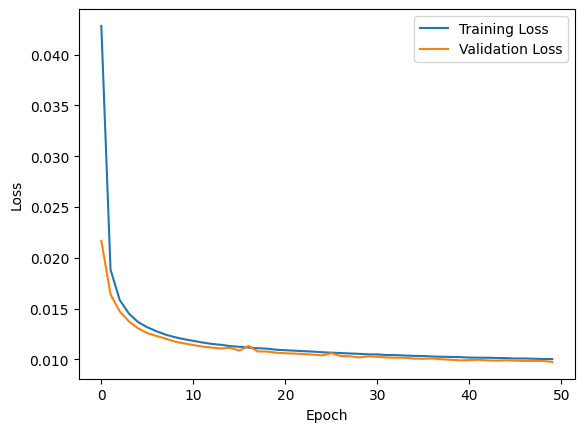

In [75]:
# Plot the history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
# predict on the sample data
preds = conv_model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


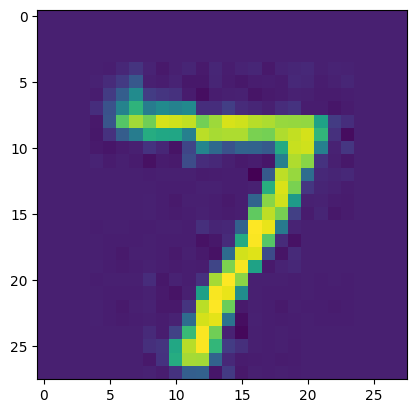

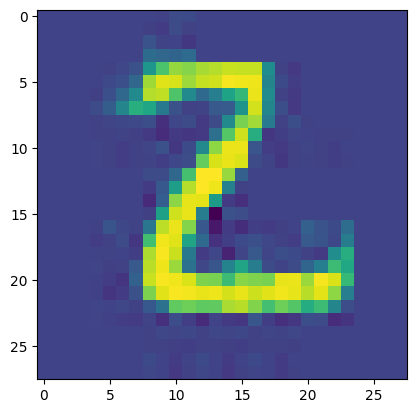

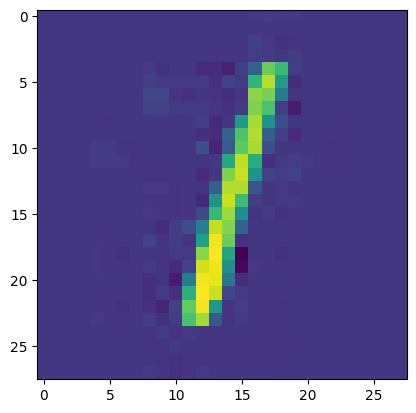

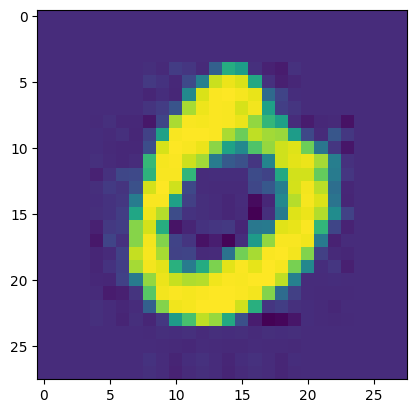

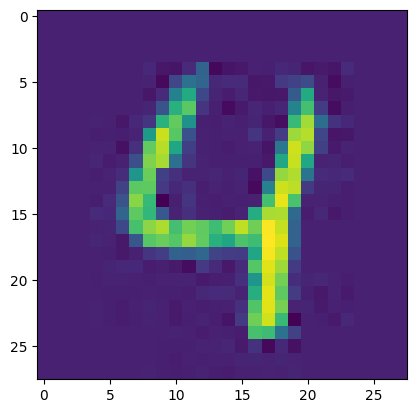

In [79]:
# visulize the predicted output
for i in preds:
  plt.imshow(i.reshape(28,28))
  plt.show()